## Goals
In this lab you will:
- Implement Linear Regression from scratch using NumPy package
- Implement Linear Regression using Scikit Learn package

## 1. Implementing Linear Regression using Numpy 

### 1.1 Import Packages
Import necessary packages like numpy, pandas and matplotlib.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])
%matplotlib inline

### 1.2 Data Preprocessing Functions

Following this, we'll define two functions crucial for data preprocessing:

1. `extractfeatures` - reads the dataset file and yields the features and target variable as numpy arrays.
2. `standardizeFeatures` - standardizes the features to be centered around the mean with a unit standard deviation.

In [60]:
def splitdata(filename, feature_name, target_name):
    """
    Split the dataset into training and testing sets.
    Then Extracts features and target variable for both sets.
    
    Parameters:
    - filename (str): The path of the dataset file.
    - feature_name (str): The name of the feature variable.
    - target_name (str): The name of the target variable.

    Returns:
    Tuple[np.ndarray, np.ndarray]: A tuple containing four numpy arrays:
        - The trainig dataset features array.
        - The trainig dataset target variable array.
        - The testing dataset features array.
        - The testing dataset target variable array.
    """
    dataset = pd.read_csv(filename)
    shuffled_dataset = dataset.sample(frac=1)
    traning_size = int(len(shuffled_dataset)*0.8)
    training = shuffled_dataset.iloc[:traning_size,:]
    testing = shuffled_dataset.iloc[traning_size:,:]
    x_train = training[feature_name].to_numpy()
    y_train = training[target_name].to_numpy()
    x_test = testing[feature_name].to_numpy()
    y_test = testing[target_name].to_numpy()
    return x_train, y_train, x_test, y_test

In [47]:
def standardizeFeatures(X):
    """
    Standardizes a numpy array by centering it around the mean with a unit standard deviation.

    Parameters:
    - X (np.ndarray): The numpy array to be standardized.
    
    Returns:
    np.ndarray: The standardized numpy array.
    """
    return (X - X.mean())/X.std()

### 1.3 Find the best model with Gradient Descent

Next, we will implement two functions named `computeCost` and `gradientDescent`.

- `computeCost` will compute the cost of a linear regression model
-  `gradientDescent` will perform gradient descent to minimize the cost of a linear regression model.


In [55]:
def computeCost(X,y,theta):
    """
    Compute the cost of a linear regression model.

    Parameters:
    - X (numpy.ndarray): The input features, where X[:, 1] is assumed to be the feature vector.
    - y (numpy.ndarray): The target variable.
    - theta (numpy.ndarray): The parameters of the linear regression model.

    Returns:
    float: The cost of the linear regression model, calculated using the mean squared error.
    """
    
    m=len(y)
    #iterative solution
    J=0
    s=0
    for i in range(0,m):
        s=s+((theta[0]+theta[1]*X[i,1])-y[i])**2
    J=s/(2*m)
    
    #vectorized solution
    y=y.reshape(m,1)
    J1=(np.dot((np.dot(X,theta)-y).T,(np.dot(X,theta)-y)))/(2*m)

    return J1

In [56]:
def gradientDescent(X,y,theta,alpha,iterations):
    """
    Perform gradient descent to minimize the cost of a linear regression model.

    Parameters:
    - X (numpy.ndarray): The input features, where X[:, 1] is assumed to be the feature vector.
    - y (numpy.ndarray): The target variable.
    - theta (numpy.ndarray): The parameters of the linear regression model.
    - alpha (float): The learning rate, controlling the step size in the gradient descent process.
    - iterations (int): The number of iterations for gradient descent.

    Returns:
    tuple: A tuple containing:
        - numpy.ndarray: The optimized parameters (theta) for the linear regression model.
        - numpy.ndarray: The history of cost values during each iteration.
    """
    J_history=np.zeros((iterations,1))

    m=len(y)# number of training examples
    y=y.reshape(m,1)
    for iter in range(0,iterations):
        s1=0
        s0=0
        for i in range(0,m):
            s0+=((theta[0]+theta[1]*X[i,1])-y[i])
            s1+=((theta[0]+theta[1]*X[i,1])-y[i])*X[i,1]
        theta[0]=theta[0]-alpha*s0/m
        theta[1]=theta[1]-alpha*s1/m
        J_history[iter]=computeCost(X,y,theta)
    return theta,J_history

### 1.4 Prediction and Mean Squared Error

Now, we will implement two functions named `predict` and `meanSquaredError`.

- `predict` predicts the target variable using the parameters of a linear regression model.

- `meanSquaredError` calculates the mean squared error between actual and predicted values.

In [57]:
def predict(theta,X):
    """
    Predict the target variable using the parameters of a linear regression model.

    Parameters:
    - theta (numpy.ndarray): The parameters of the linear regression model.
    - X (numpy.ndarray): The input features, where X is assumed to be a single feature vector.

    Returns:
    float: The predicted value of the target variable based on the linear regression model.
    """
    return theta[0]+theta[1]*X

In [58]:
def MeanSquaredError(y, y_pred):
    """
    Calculate the mean squared error between actual and predicted values.

    Parameters:
    - y (numpy.ndarray): The actual target variable values.
    - y_pred (numpy.ndarray): The predicted target variable values.

    Returns:
    float: The mean squared error between actual and predicted values, rounded to three decimal places.
    """
    return round(((y - y_pred)**2).sum()/len(y),3)

Now, we can employ the functions we have defined to train a linear regression model using the `linear_dataset.csv`, aiming to predict the target variable `Y` based on a linear relationship with the feature `X`.

Load the dataset, split into training and testing set and then and generate the features and target variables for both sets using the `splitdata` function. 

In [66]:
X_train,y_train, X_test, y_test=splitdata('linear_dataset.csv', "X", "Y")#loading data from training dataset

Let's plot our training  data to check the relation between X and Y.

Text(0, 0.5, '$y$')

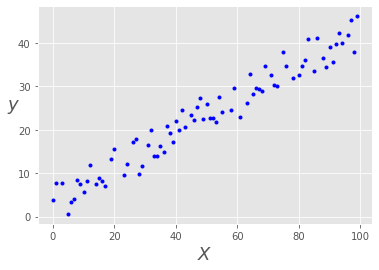

In [69]:
plt.figure(1)
plt.plot(X_train,y_train,'b.')
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

Next, we need to standadize the data using the `standardizeFeatures` function. 

In [71]:
norm_X = standardizeFeatures(X_train)
print("Training Data Normalization ended")

Training Data Normalization ended


Prior to initiating the training of a linear regression model, let's determine the optimal parameters for this dataset by applying the closed-form solution discussed in our linear algebra lectures.

In [73]:
A = np.c_[np.ones((norm_X.size,1)),norm_X]
theta_analytical = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y_train)
print('Theta (analytical): [ {:0.3f} , {:0.3f} ]^t'.format(theta_analytical[0],theta_analytical[1]))

Theta (analytical): [ 23.171 , 11.334 ]^t


Let's plot the prediction line we got from the closed form solution. 

Text(0, 0.5, '$y$')

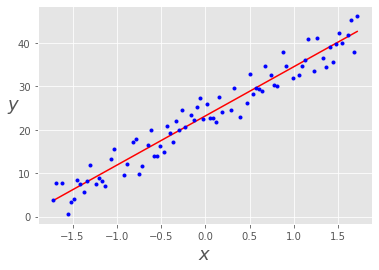

In [75]:
X_ln = np.array([min(norm_X),max(norm_X)]) #Plot a line between min x and max x
A_ln = np.c_[np.ones((2,1)),X_ln]
y_ln = A_ln.dot(theta_analytical)

plt.figure(1)
plt.plot(X_ln,y_ln,'r-')
plt.plot(norm_X,y_train,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

Now, we are ready the train the linear model using the training set. 

In [78]:
input_X=np.c_[np.ones((len(norm_X),1)),norm_X]#Add a column of ones to X
theta=np.ones((2,1))#initialize fitting parameters

iterations=100
alpha = 0.05

theta1,J_history=gradientDescent(input_X,y_train,theta,alpha,iterations)#gets the final data and the values of cost function in each iteration

Let's compute the Mean Squared Error for the training set using the `MeanSquaredError` function. 

In [79]:
print("The Mean Squared Error in the training set for alpha =  ",alpha, "is ", sumSquaresError(y_train, predict(theta1, norm_X)))

The Mean Squared Error in the training set for alpha =   0.05 is  7.211


Let's compute the Mean Squared Error for the testing set using the `MeanSquaredError` function. 

In [80]:
print("The Mean Squared Error in the testing set for alpha =  ",alpha, "is ", sumSquaresError(y_test, predict(theta1, standardizeFeatures(X_test))))

The Mean Squared Error in the testing set for alpha =   0.05 is  8.153


Let's plot the prediction line we leaned from linear regression.

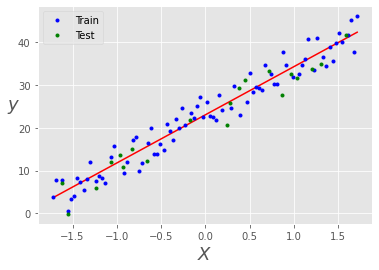

In [84]:
X_ln = np.array([min(norm_X),max(norm_X)]) #Plot a line between min x and max x
A_ln = np.c_[np.ones((2,1)),X_ln]
y_ln = A_ln.dot(theta1)

plt.figure(1)
plt.plot(X_ln,y_ln,'r-')
plt.plot(norm_X,y_train,'b.', label = "Train")
plt.plot(standardizeFeatures(X_test),y_test,'g.', label = "Test")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend()

## 2. Implementing Linear Regression with Scikit Learn

Import the necessary function from scikit learn. 

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Load the data info a pandas dataframe using the `read_csv` function. 

In [126]:
data = pd.read_csv("linear_dataset.csv")

In [127]:
data.head()

,X,Y
0,0,3.771566
1,1,7.721047
2,2,7.037857
3,3,7.683817
4,4,-0.150454


#### Standadize the data

Standardize the data using the `fit_transform` function of `StandardScaler`. 

In [128]:
data[["X"]] = StandardScaler().fit_transform(data[["X"]])

#### Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

##### Train Test Split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Y',axis=1), 
                                                    data['Y'], test_size=0.2, 
                                                    random_state=42)

#### Create and fit the regression model

In [130]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### View parameters
Note, the parameters are associated with the *normalized* input data. The fit parameters are very close to those found with the closed form solution. 

In [131]:
intercept = model.intercept_
slope = model.coef_
print(f"model parameters:slope: {slope}, intercept:{intercept}")
print( f"parameters from numpy solution: slope: {theta[1]}, intercept: {theta[0]}")
print( f"parameters from closed form solution: slope: {theta_analytical[1]}, intercept: {theta_analytical[0]}")

model parameters:slope: [11.14415487], intercept:23.026239478381527
parameters from numpy solution: slope: [11.27310318], intercept: [23.03972532]
parameters from closed form solution: slope: 11.334287635579212, intercept: 23.170989313342638


#### Make predictions
Predict the targets of the training and testing data.

In [132]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#### Calculate Mean Squared Error from the `sklearn.metrics` package. 

In [138]:
train_error = MeanSquaredError(y_train, y_train_predict)
test_error = MeanSquaredError(y_test, y_test_predict)

In [139]:
print(f"Mean Squared Error for the training dataset:{train_error}")
print(f"Mean Squared Error for the testing dataset:{test_error}")

Mean Squared Error for the training dataset:7.596
Mean Squared Error for the testing dataset:6.356


Congratulations!

In this lab you:

- learned how to implement Linear Regression from scratch using Numpy.
- learned how to implement Linear Regression using the scikit-learn Package. 